### Heart disease prediction

Attributes
1.	Systolic blood pressure (Sbp)
2.	Cumulative tobacco consumption (kg)
3.	Low density lipoprotein (LDL-cholesterol)
4.	Adiposity
5.	Family history of heart disease (Present/Absent)
6.	Type-A behavior
7.	Obesity
8.	Current alcohol consumption
9.	Age during onset of condition
10.	CHD response


In [1]:
#  importing primary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Read the dataset
CHD = pd.read_csv('E:\Data sets\CHDdata.csv')

In [3]:
CHD.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
CHD

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [5]:
CHD.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [6]:
CHD.tail()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [7]:
CHD.shape

(462, 10)

In [8]:
CHD.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [9]:
CHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [10]:
CHD.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [11]:
CHD["chd"].value_counts()

0    302
1    160
Name: chd, dtype: int64

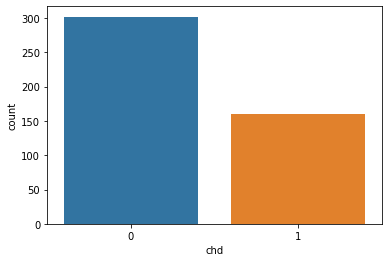

In [13]:
sns.countplot(x="chd", data=CHD)
plt.show()

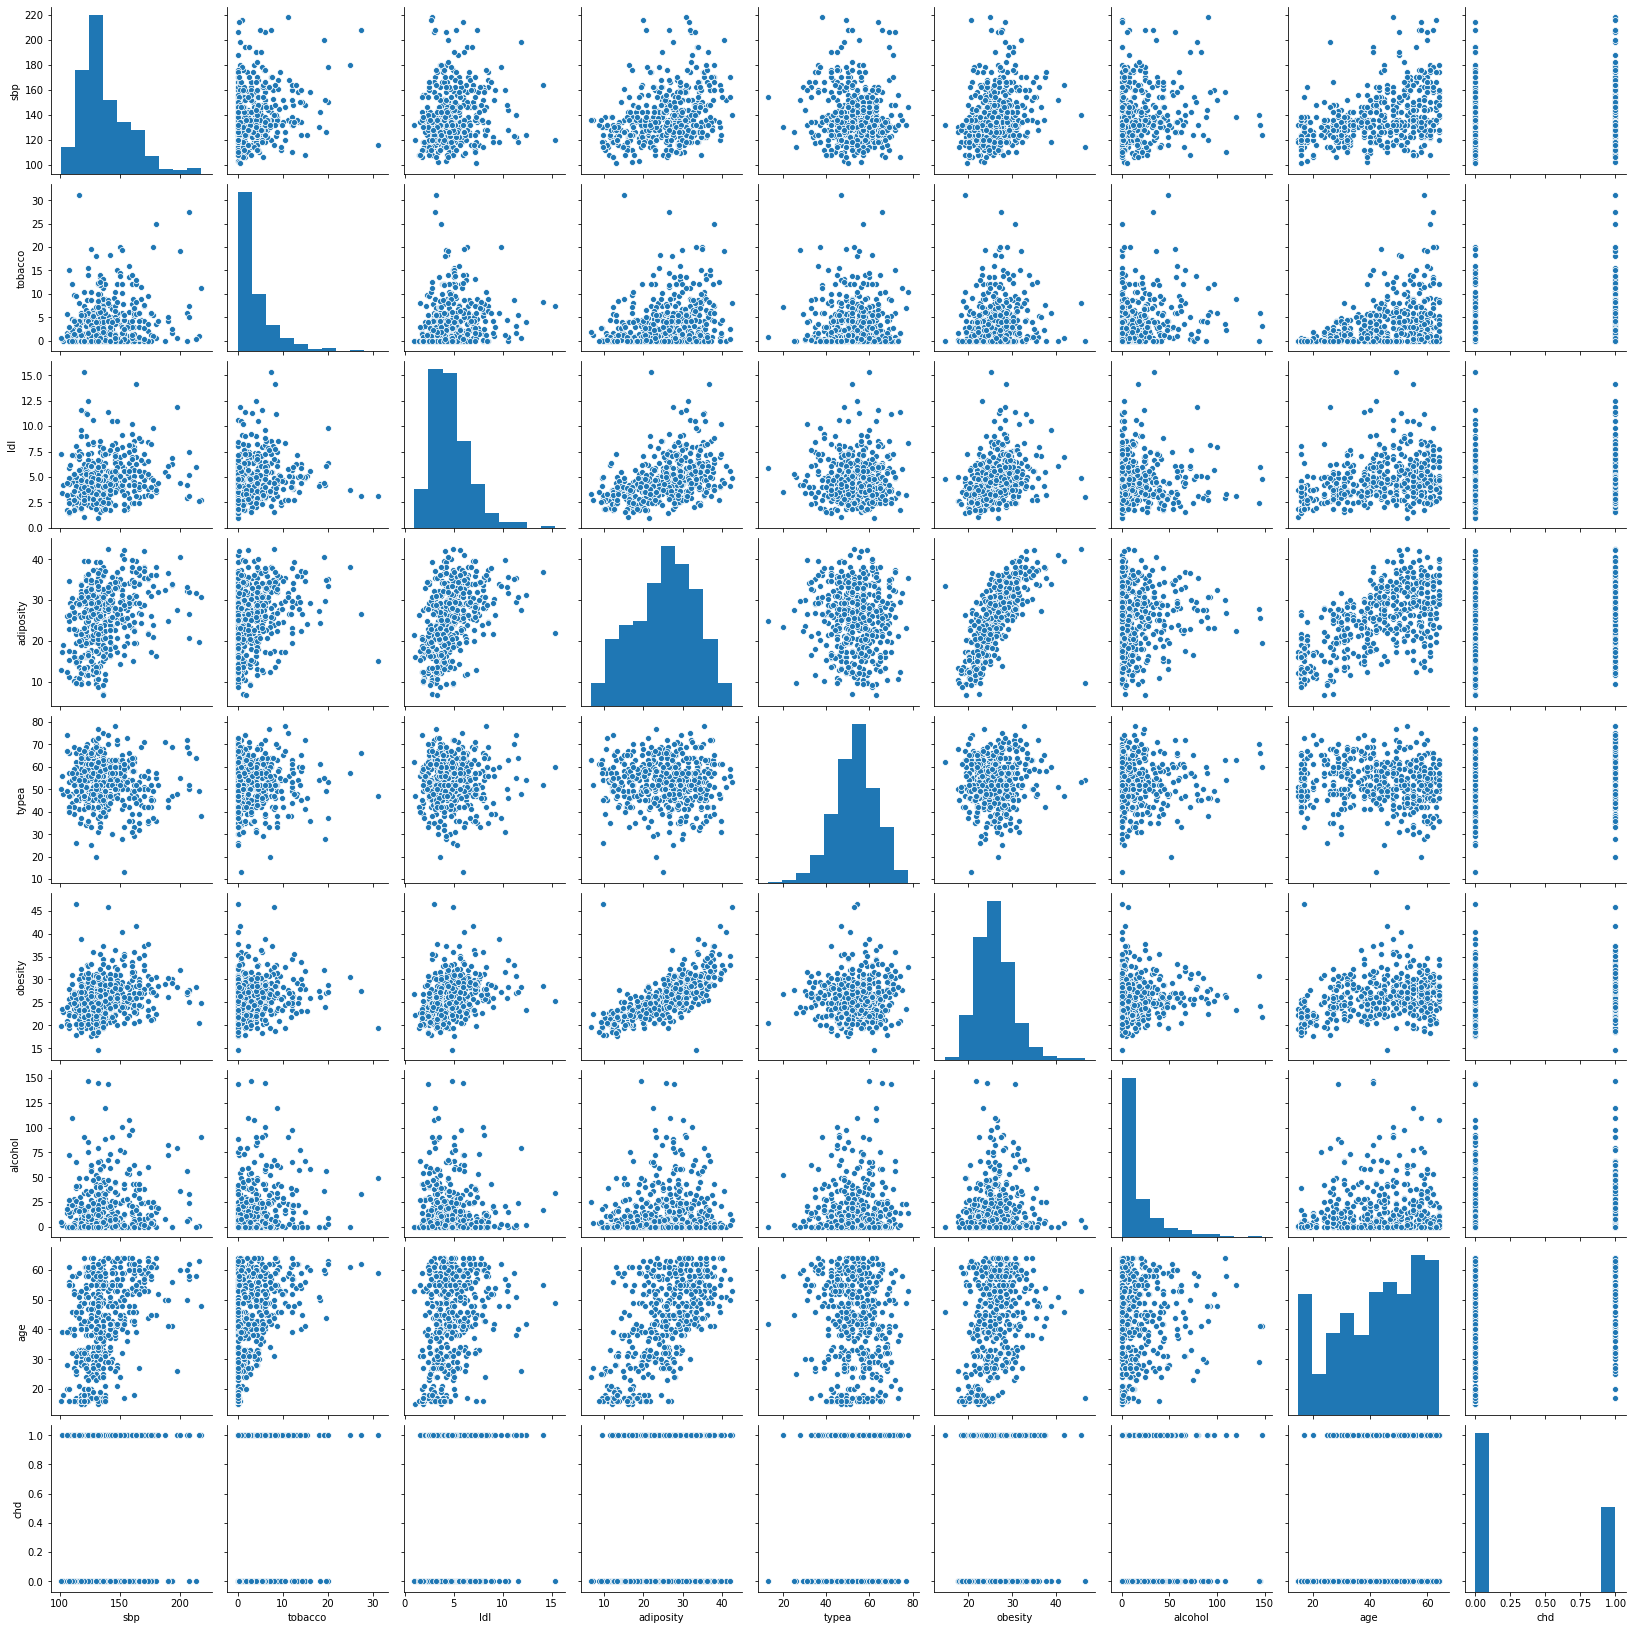

In [14]:
# Linear relationship and correlation
sns.pairplot(CHD)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254D0FB4B08>,
      dtype=object)

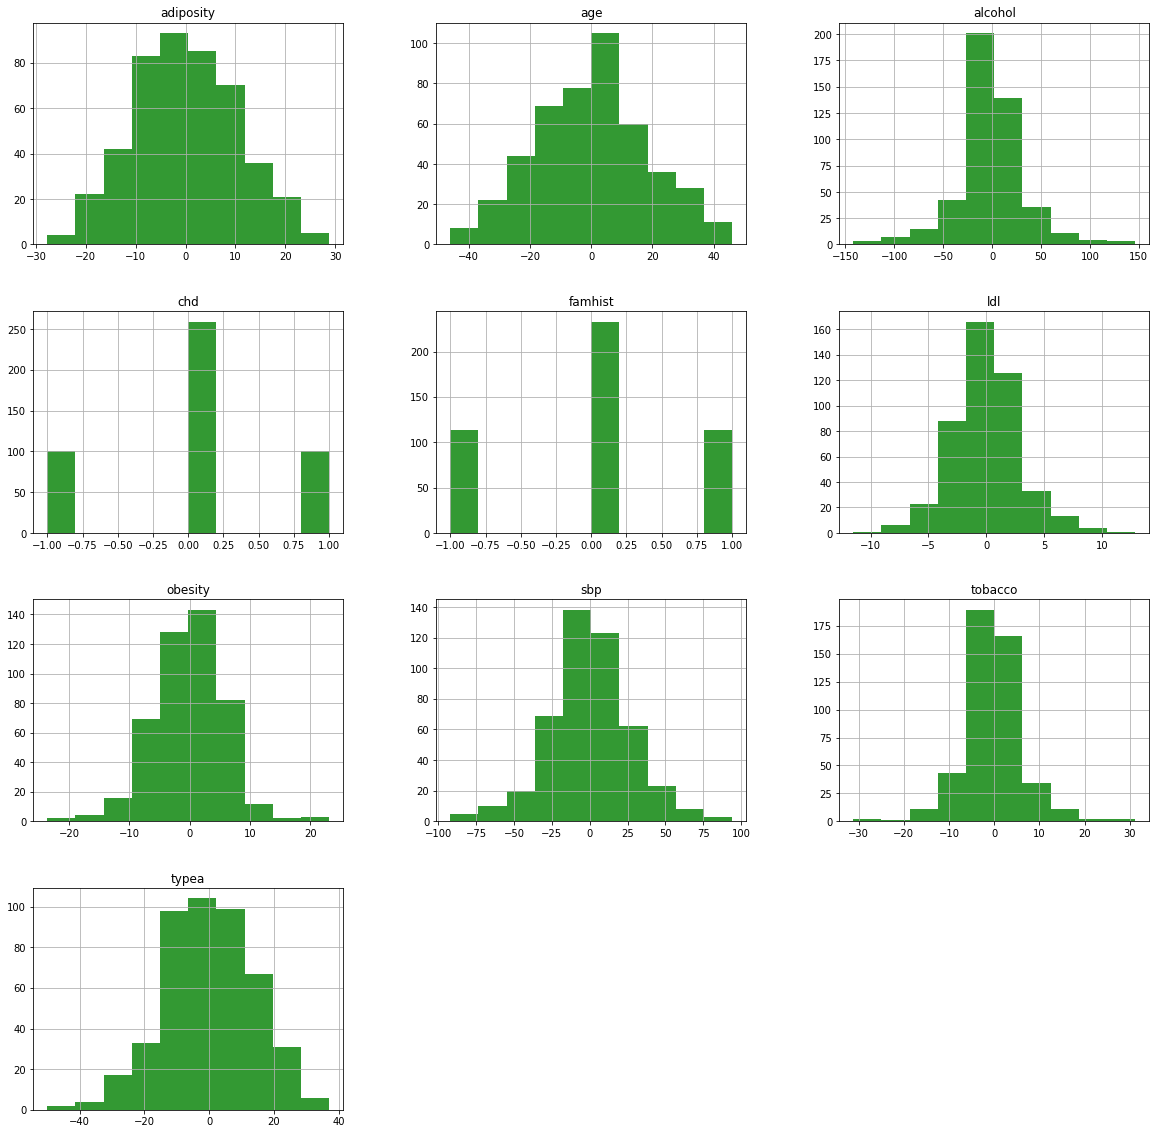

In [27]:
# data distributions
CHD.diff().hist(color = 'g', alpha = 0.8, figsize=(20,20))

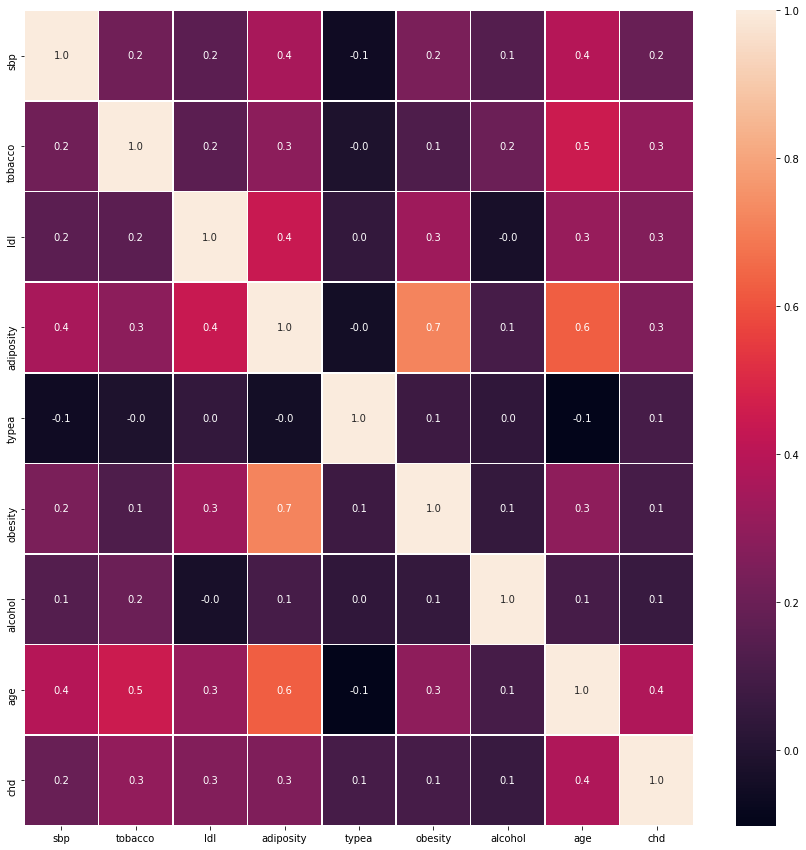

In [16]:
# visualizing the graphical representation of data 
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(CHD.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

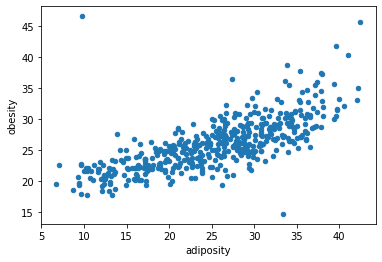

In [17]:
# visualize the relationship between the two features
CHD.plot.scatter(x = 'adiposity', y = 'obesity')

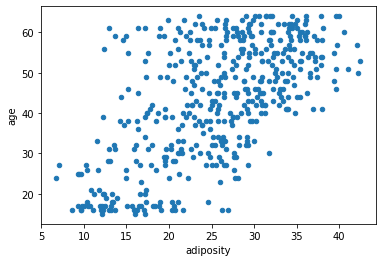

In [18]:
CHD.plot.scatter(x = 'adiposity', y = 'age')

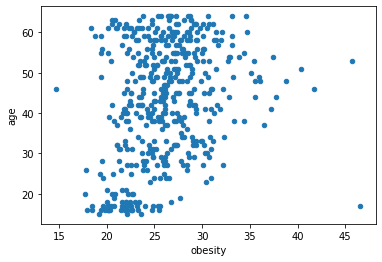

In [19]:
CHD.plot.scatter(x = 'obesity', y = 'age')

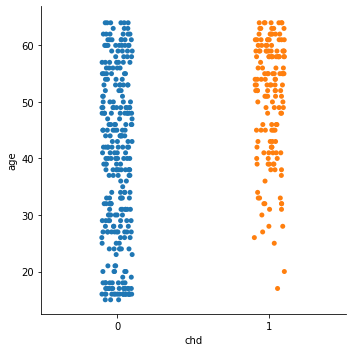

In [20]:
sns.catplot(y = 'age', x = 'chd', data = CHD)

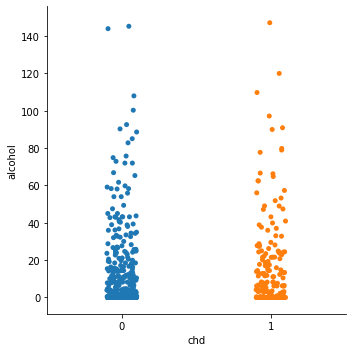

In [21]:
sns.catplot(y = 'alcohol', x = 'chd', data = CHD)

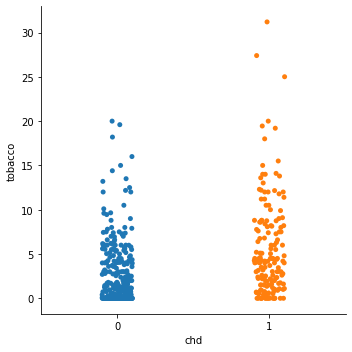

In [22]:
sns.catplot(y = 'tobacco', x = 'chd', data = CHD)

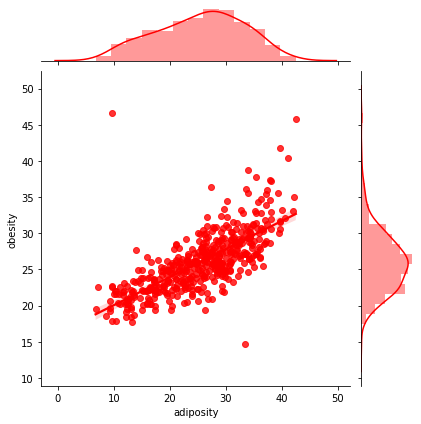

In [23]:
# distributions and correlations between 'Adiposity' and 'obesity'
sns.jointplot(x='adiposity', y='obesity', data=CHD,color='r',kind="reg|")  
plt.show()

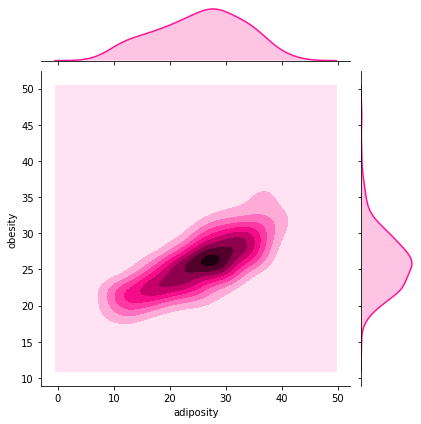

In [24]:
sns.jointplot(x='adiposity', y='obesity', data=CHD,color='deeppink',kind="kde")  
plt.show()

In [25]:
CHD["famhist"]=np.where(CHD["famhist"]=="Present",1,0)

In [26]:
CHD

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [62]:
X = CHD.drop('chd', axis=1)
y = CHD['chd']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20)

#### Logestic regression

In [64]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\Rajesh Mohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
prediction=log_reg.predict(X_test)

In [66]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[59  6]
 [11 17]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        65
           1       0.74      0.61      0.67        28

    accuracy                           0.82        93
   macro avg       0.79      0.76      0.77        93
weighted avg       0.81      0.82      0.81        93



In [67]:
log_reg.score(X,y)

0.7337662337662337

#### Support Vector Classification



In [76]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
y_pred= svclassifier.predict(X_test)

In [78]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[54 11]
 [12 16]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        65
           1       0.59      0.57      0.58        28

    accuracy                           0.75        93
   macro avg       0.71      0.70      0.70        93
weighted avg       0.75      0.75      0.75        93



In [79]:
svclassifier.score(X,y)

0.7380952380952381

#### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
y_pred= classifier.predict(X_test)

In [74]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[41 24]
 [11 17]]
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        65
           1       0.41      0.61      0.49        28

    accuracy                           0.62        93
   macro avg       0.60      0.62      0.60        93
weighted avg       0.68      0.62      0.64        93



In [75]:
classifier.score(X,y)

0.9242424242424242

In [80]:
print('log_regression: {}'.format(log_reg.score(X,y)))
print('Support Vector Classification: {}'.format(svclassifier.score(X,y)))
print('Decision Tree: {}'.format(classifier.score(X,y)))


log_regression: 0.7337662337662337
Support Vector Classification: 0.7380952380952381
Decision Tree: 0.9242424242424242
